In [1]:
import sys
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
curdir = os.path.abspath(os.path.curdir)
sys.path.append(os.path.join(os.path.dirname(curdir), 'tf_pose'))

In [3]:
from pycocotools.coco import COCO

In [12]:
dataset_path = '/home/artia/prj/datasets/coco'

In [13]:
coco = COCO(os.path.join(dataset_path, 'annotations/person_keypoints_val2017.json'))

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [14]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img_info = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

{'license': 2, 'file_name': '000000530162.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000530162.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-18 09:18:51', 'flickr_url': 'http://farm9.staticflickr.com/8500/8252946447_07db876128_z.jpg', 'id': 530162}


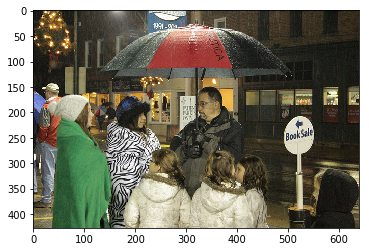

In [15]:
print(img_info)
filename = img_info['file_name']
img = cv2.imread(os.path.join(dataset_path, 'val2017', filename))[:,:,::-1]
plt.imshow(img)

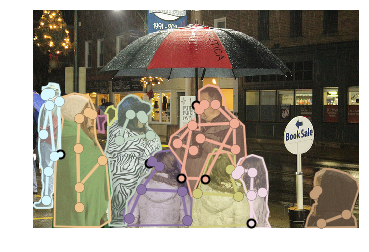

In [16]:
annIds = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds, iscrowd=None) #get annotations ids of the image
anns = coco.loadAnns(annIds) #get annotation infomation of that image

#show the annotation on the image.
plt.imshow(img); plt.axis('off')
coco.showAnns(anns) 

In [17]:
contours = []
for ann in anns:
    if 'segmentation' in ann:
        if type(ann['segmentation']) == list:
            # polygon
            for seg in ann['segmentation']:
                poly = np.array(seg).reshape((-1, 1, 2)).astype(np.int32)
                contours.append(poly)

print(len(contours))

10


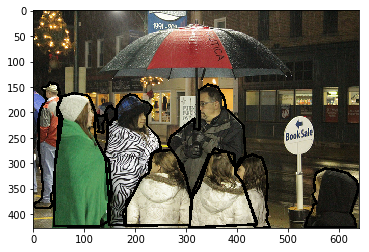

In [18]:
plt.imshow(cv2.drawContours(img.copy(), contours, -1, (0, 0, 0), 3))

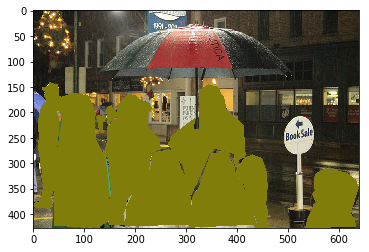

In [19]:
test = img.copy()
plt.imshow( cv2.drawContours(test, contours, -1, (128, 125, 10), -1) )

In [20]:
mask = cv2.inRange(test, (128, 125, 10), (128, 125, 10))

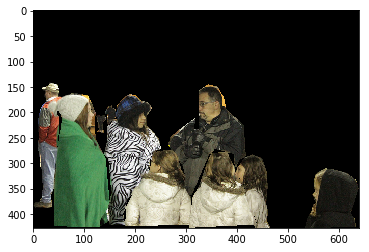

In [21]:
res = cv2.bitwise_and(img,img, mask= mask)
plt.imshow(res)

In [31]:
cv2.imwrite('sibal.png', res[:, :, ::-1])

True

In [22]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	print('lower: %d  upper: %d' % (lower, upper))
 
	# return the edged image
	return edged

(Text(0.5,1,'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

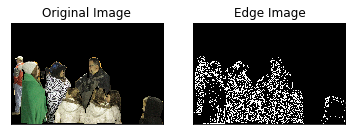

In [23]:
pre_image = res.copy()

red = pre_image[:,:,0]
green = pre_image[:,:,1]
blue = pre_image[:,:,2]

red_edges = cv2.Canny(red,60, 100)
green_edges = cv2.Canny(green, 60, 100)
blue_edges = cv2.Canny(blue, 60, 100)

edges = np.uint8(red_edges+green_edges+blue_edges)/3


plt.subplot(121),plt.imshow(pre_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

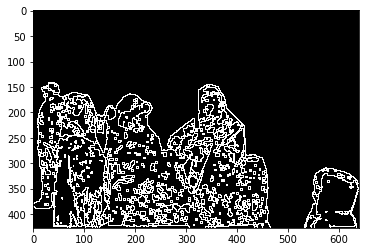

In [24]:
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

kernel = np.ones((3,3),np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
plt.imshow(edges, cmap='gray')

True

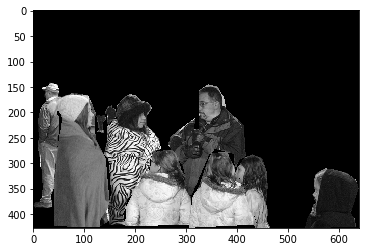

In [25]:
gray_image = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

cv2.imwrite('test.png', gray_image)


#### Test 1

(Text(0.5,1,'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

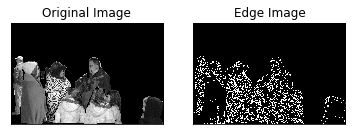

In [26]:
pre_image = gray_image.copy()
edges = cv2.Canny(pre_image,60, 100)
#edges = cv2.dilate(edges, None)

plt.subplot(121),plt.imshow(pre_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

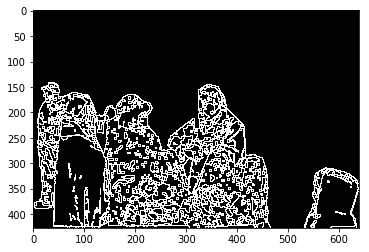

In [27]:
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

kernel = np.ones((3,3),np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
plt.imshow(edges, cmap='gray')

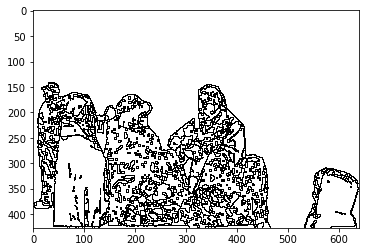

In [28]:
inverted = 255 - edges
plt.imshow(inverted, cmap='gray')

In [29]:
pre_image = cv2.GaussianBlur(gray_image,(3,3),0)

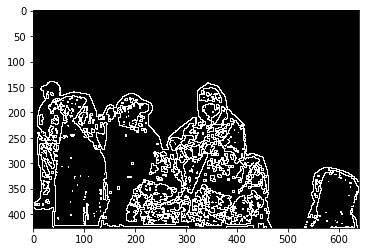

In [30]:
laplacian64 = cv2.Laplacian(pre_image, cv2.CV_64F)

laplacian = np.uint8(np.absolute(laplacian64))
#laplacian = cv2.dilate(laplacian, None)
ret, edges = cv2.threshold(laplacian,10,255, cv2.THRESH_BINARY)
#plt.imshow(edges, cmap='gray')
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
kernel = np.ones((3,3),np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
plt.imshow(edges, cmap='gray')

#### Test 2

In [103]:
pre_image = cv2.GaussianBlur(gray_image,(3,3),0)

lower: 0  upper: 0


(Text(0.5,1,'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

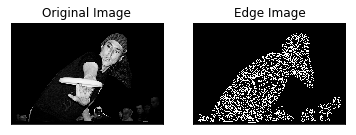

In [107]:
edges = auto_canny(gray_image)

plt.subplot(121),plt.imshow(pre_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

#### Test 2

In [81]:
pre_image = cv2.GaussianBlur(gray_image,(3,3),0)

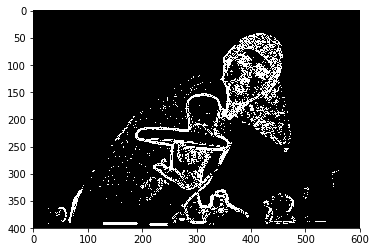

In [82]:
laplacian64 = cv2.Laplacian(pre_image, cv2.CV_64F)10

laplacian = np.uint8(np.absolute(laplacian64))
#laplacian = cv2.dilate(laplacian, None)
ret, thresh1 = cv2.threshold(laplacian,10,255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

plt.show()

#### Test 3

lower :  0 upper 0


(Text(0.5,1,'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

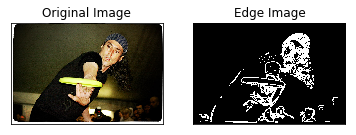

In [27]:
gray_image = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
sigma = 0.33
#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * sigma))
upper = int(min(255, (1.0 + sigma) * sigma))
print('lower : ',lower, 'upper', upper)
edges = cv2.Canny(gray_image,130,130)
edges = cv2.dilate(edges, None)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

#### test 4

In [84]:
pre_image = cv2.GaussianBlur(gray_image,(3,3),0)
kernel = np.ones((5,5),np.uint8)

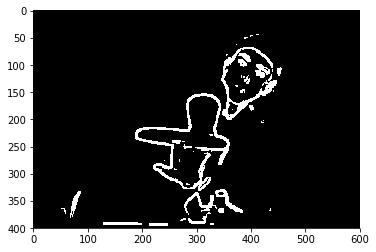

In [101]:
pre_image = cv2.GaussianBlur(gray_image,(3,3),0)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(pre_image, cv2.MORPH_GRADIENT, kernel)
ret, threshold = cv2.threshold(gradient, 80, 255, cv2.THRESH_BINARY)
plt.imshow(threshold, cmap='gray')

241

In [206]:
img = cv2.imread('gochu.jpg')[:,:,::-1]

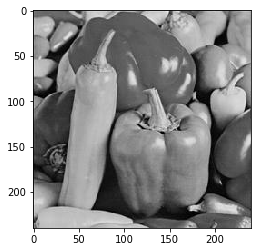

In [207]:
plt.imshow(img)

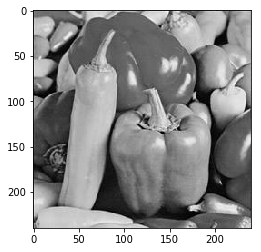

In [208]:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

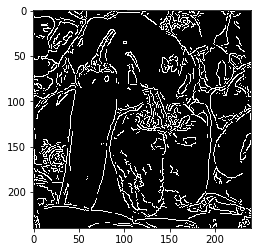

In [209]:
pre_image = gray_image.copy()
edges = cv2.Canny(pre_image,60,100)
#edges = cv2.dilate(edges, None)

plt.imshow(edges, cmap='gray')

In [210]:
import cv2
from matplotlib import pyplot as plt

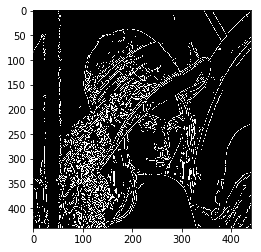

In [213]:
lena = cv2.imread('lena.png')[:,:,::-1]

# convert image to grayscale (NOTE: we could have used 0 as arg 2 for imread())
lena_grayscale = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

# find canny edges
lena_canny = cv2.Canny(lena_grayscale, 60, 100)
# edges = cv2.dilate(lena_canny, None)
# edges = cv2.erode(edges, None)

plt.imshow(lena_canny, cmap='gray')

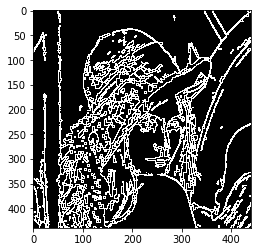

In [216]:
lena = cv2.imread('lena.png')[:,:,::-1]

# convert image to grayscale (NOTE: we could have used 0 as arg 2 for imread())
lena_grayscale = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

# find canny edges
lena_canny = cv2.Canny(lena_grayscale, 60, 100)
edges = cv2.dilate(lena_canny, None)
edges = cv2.erode(edges, None)
kernel = np.ones((3,3),np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
plt.imshow(edges, cmap='gray')